In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
dataFrame = pd.read_csv("/content/data.csv")

dataFrame

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,2,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2288,2,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2289,7,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2290,5,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data = np.array(dataFrame)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
Y_train

array([1., 1., 7., ..., 9., 0., 7.])

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [10]:
# Assuming you have data stored in numpy arrays X and Y
# Replace this with your actual data loading code
import numpy as np

# Load your data (replace with your data loading code)
X = np.random.rand(784, 1000)  # Replace with your actual data
Y = np.random.randint(0, 10, 1000)  # Replace with your actual labels

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Train the neural network
W1, b1, W2, b2 = gradient_descent(X, Y, alpha, iterations)

# Make predictions on new data
X_test = np.random.rand(784, 100)  # Replace with your test data
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_test)
predictions = get_predictions(A2)

# Calculate accuracy on the test set
Y_test = np.random.randint(0, 10, 100)  # Replace with your test labels
accuracy = get_accuracy(predictions, Y_test)
print("Test accuracy: ", accuracy)


Streaming output truncated to the last 5000 lines.
 3 4 1 5 7 8 2 8 5 6 5 6 2 5 0 4 3 6 9 1 7 9 6 8 3 0 9 6 0 7 5 9 5 9 5 2 0
 6 0 0 0 5 7 9 2 1 0 0 0 7 3 1 7 7 7 7 2 0 9 6 7 7 8 5 8 7 0 1 3 2 6 9 9 3
 3 8 7 6 0 1 9 0 7 5 9 7 5 7 1 7 9 2 7 1 6 5 3 8 7 9 7 5 8 9 0 5 0 6 4 2 1
 0 7 5 2 8 4 7 9 3 6 0 5 9 2 7 5 9 5 4 0 6 1 6 7 6 7 9 9 8 2 3 2 5 2 7 5 2
 3 8 6 0 6 1 4 6 8 7 5 9 6 3 7 6 2 4 7 0 0 4 7 3 5 5 0 6 1 6 9 7 3 9 6 0 7
 6 6 9 0 9 2 2 0 0 7 5 8 5 0 4 2 0 1 7 4 0 4 6 3 6 7 7 7 9 1 3 3 6 3 8 5 1
 4] [7 5 7 4 6 2 9 6 0 6 2 4 5 1 2 9 9 5 2 8 2 8 4 1 4 9 9 5 0 1 8 5 3 2 4 7 5
 7 2 2 3 6 6 9 2 6 3 1 5 2 6 0 7 2 0 9 4 9 1 0 6 0 9 4 5 6 9 1 0 5 3 2 3 9
 3 1 3 0 5 0 0 4 3 6 8 5 4 8 7 8 1 9 5 7 7 1 3 3 1 4 2 9 3 7 2 0 4 2 3 7 3
 1 4 0 7 2 6 6 8 8 0 8 6 9 7 0 7 5 9 0 8 3 3 5 5 4 0 6 3 5 8 2 7 7 6 2 4 9
 9 8 2 0 0 3 7 3 0 2 0 0 7 2 0 2 6 7 3 1 6 8 8 2 1 3 4 8 4 5 4 1 5 2 5 7 7
 9 1 0 9 2 7 0 6 2 8 0 3 9 4 0 6 6 0 6 3 9 6 8 5 9 1 4 8 4 8 6 3 8 1 9 6 8
 5 6 6 1 6 1 1 8 5 9 8 4 6 9 0 5 2 1 6 2 2 0 

In [13]:
def one_hot(Y):
    num_classes = int(Y.max() + 1)  # Convert the maximum value to an integer
    one_hot_Y = np.zeros((Y.size, num_classes), dtype=int)
    one_hot_Y[np.arange(Y.size), Y.astype(int)] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


In [14]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 9 ... 9 9 9] [1. 1. 7. ... 9. 0. 7.]
0.09442724458204334
Iteration:  10
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.09752321981424149
Iteration:  20
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.09752321981424149
Iteration:  30
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.09752321981424149
Iteration:  40
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.09752321981424149
Iteration:  50
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.09752321981424149
Iteration:  60
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.09752321981424149
Iteration:  70
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.09752321981424149
Iteration:  80
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.09752321981424149
Iteration:  90
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.09752321981424149
Iteration:  100
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.09752321981424149
Iteration:  110
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.09752321981424149
Iteration:  120
[0 0 0 ... 0 0 0] [1. 1. 7. ... 9. 0. 7.]
0.097523219814241

In [15]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [16]:
print(get_accuracy(make_predictions(X_dev,W1,b1,W2,b2) , Y_dev))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Prediction:  [0]
Label:  1.0


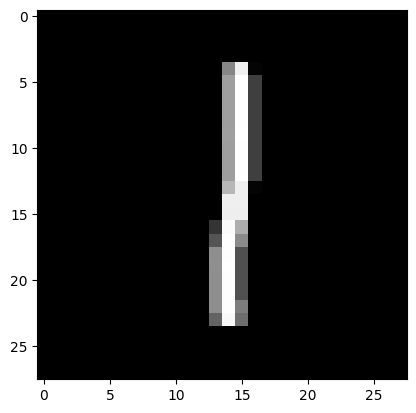

Prediction:  [0]
Label:  1.0


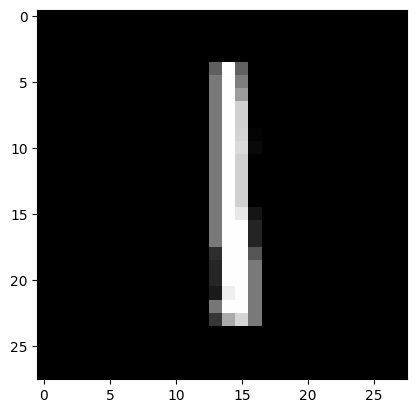

Prediction:  [0]
Label:  7.0


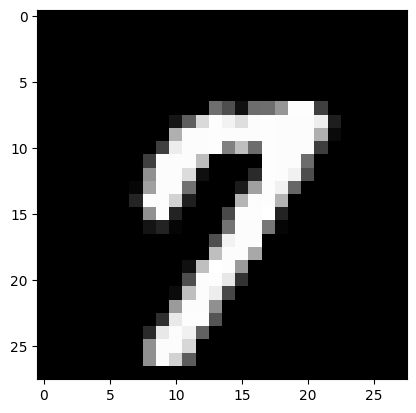

Prediction:  [0]
Label:  5.0


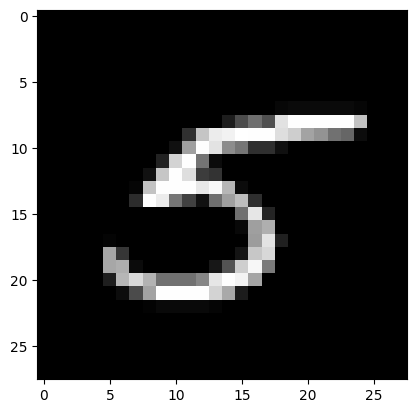

Prediction:  [0]
Label:  1.0


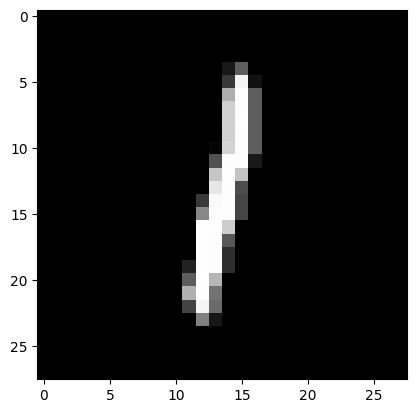

Prediction:  [0]
Label:  9.0


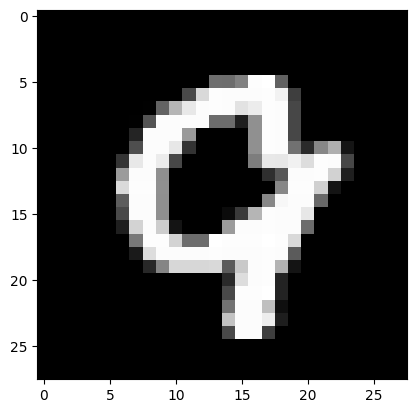

Prediction:  [0]
Label:  1.0


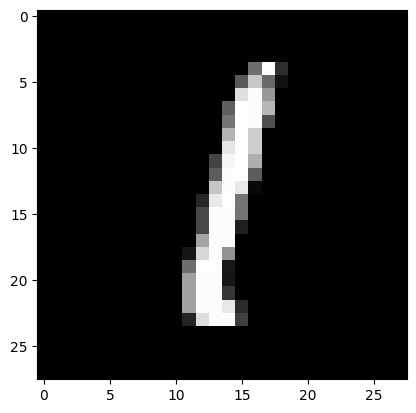

Prediction:  [0]
Label:  4.0


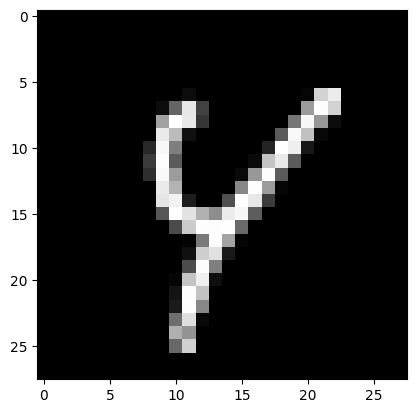

Prediction:  [0]
Label:  1.0


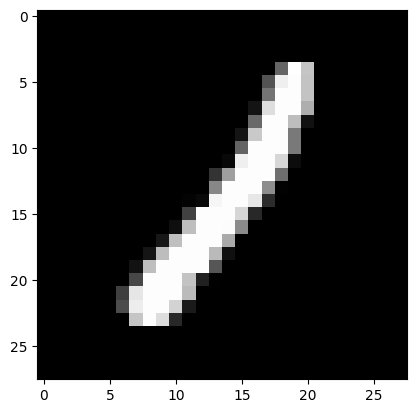

Prediction:  [0]
Label:  8.0


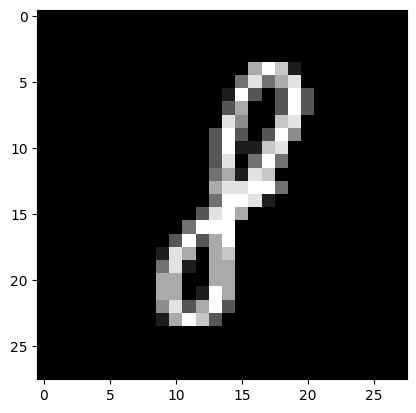

Prediction:  [0]
Label:  4.0


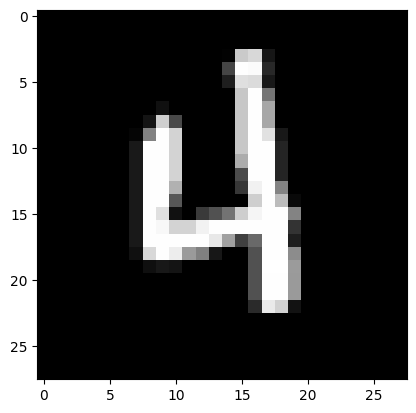

Prediction:  [0]
Label:  8.0


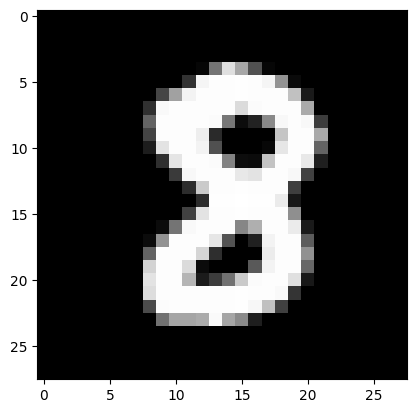

Prediction:  [0]
Label:  1.0


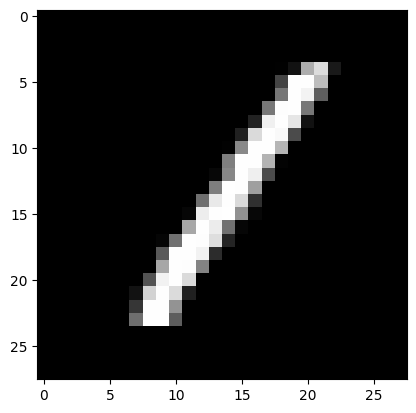

Prediction:  [0]
Label:  8.0


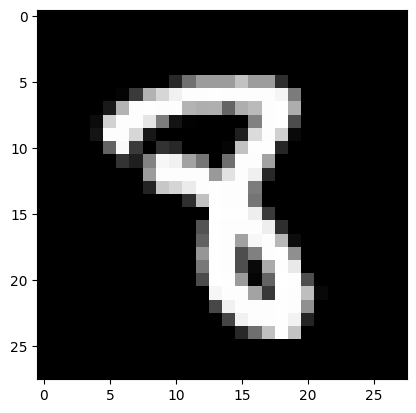

Prediction:  [0]
Label:  9.0


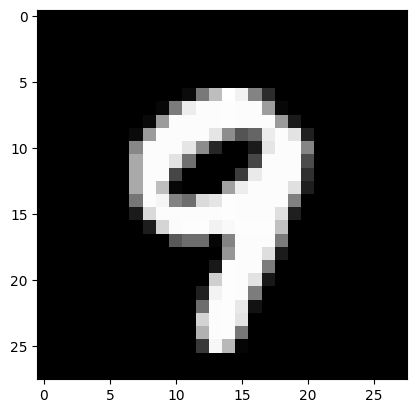

Prediction:  [0]
Label:  6.0


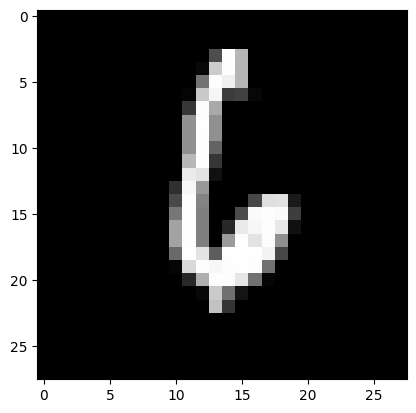

Prediction:  [0]
Label:  0.0


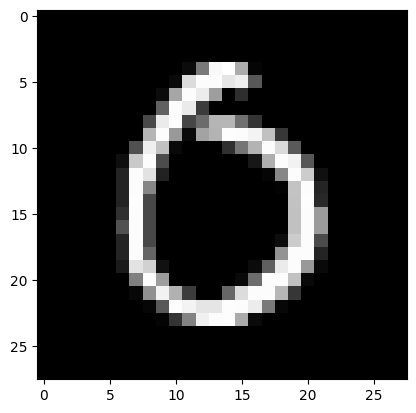

Prediction:  [0]
Label:  2.0


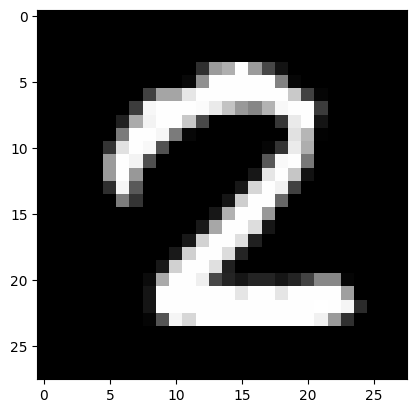

Prediction:  [0]
Label:  7.0


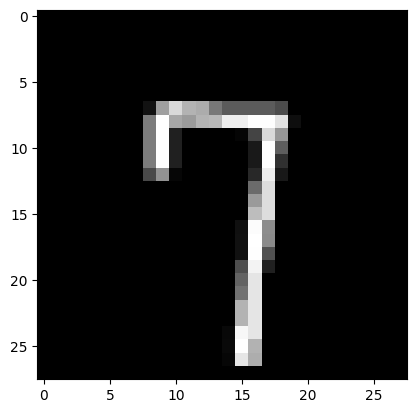

Prediction:  [0]
Label:  1.0


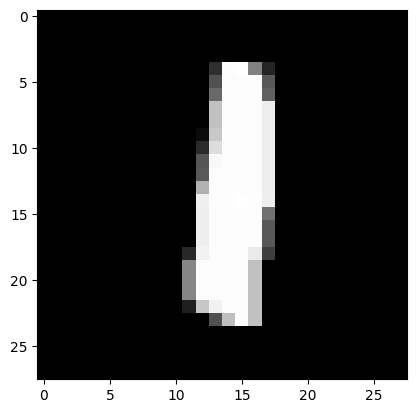

Prediction:  [0]
Label:  9.0


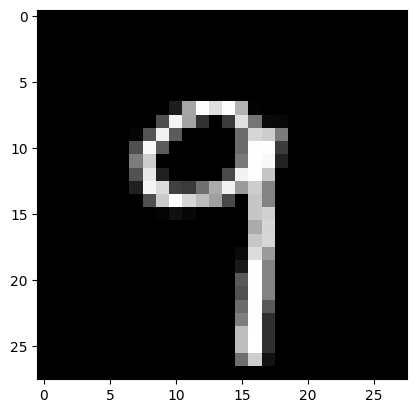

Prediction:  [0]
Label:  4.0


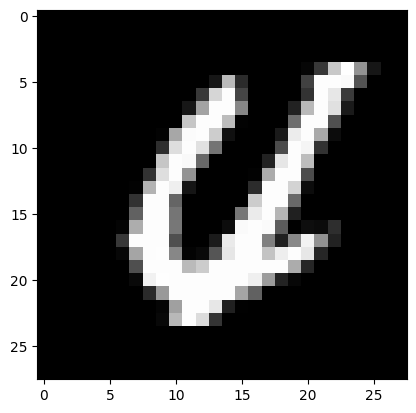

Prediction:  [0]
Label:  5.0


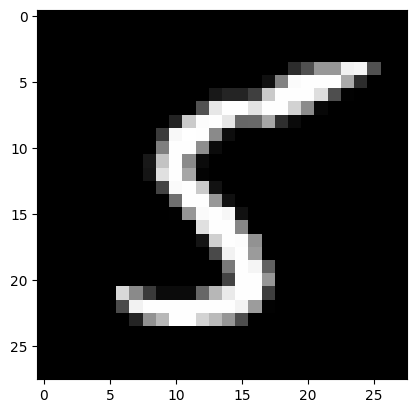

Prediction:  [0]
Label:  0.0


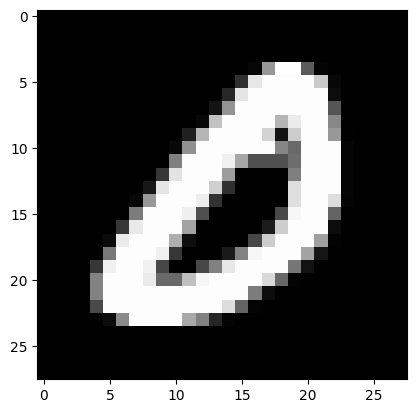

Prediction:  [0]
Label:  3.0


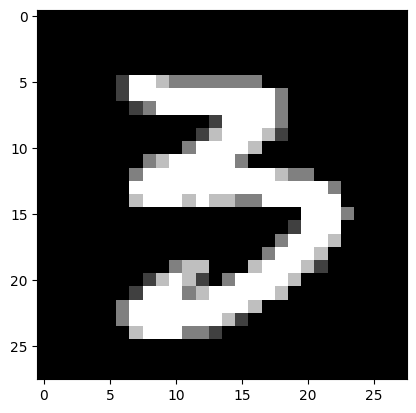

Prediction:  [0]
Label:  6.0


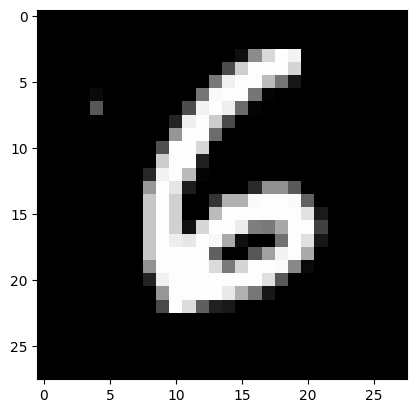

Prediction:  [0]
Label:  8.0


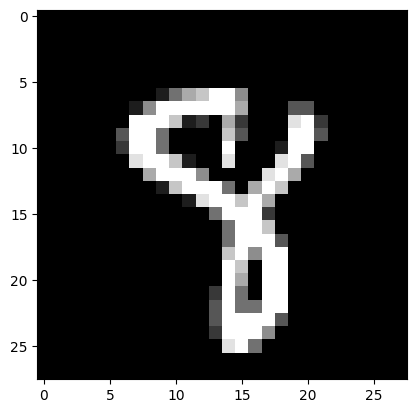

Prediction:  [0]
Label:  8.0


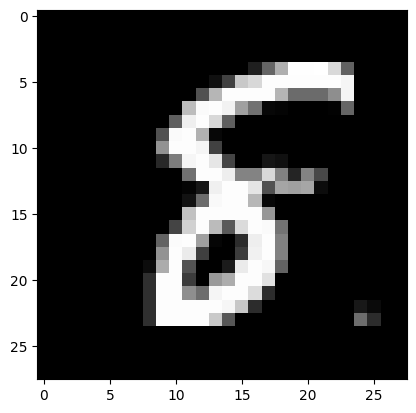

Prediction:  [0]
Label:  1.0


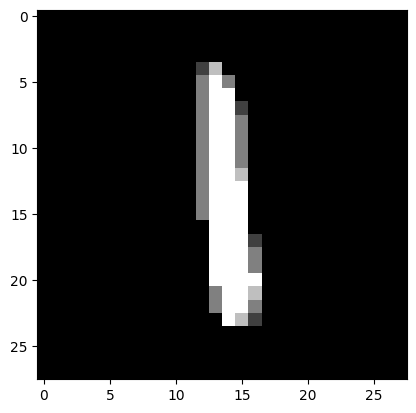

Prediction:  [0]
Label:  5.0


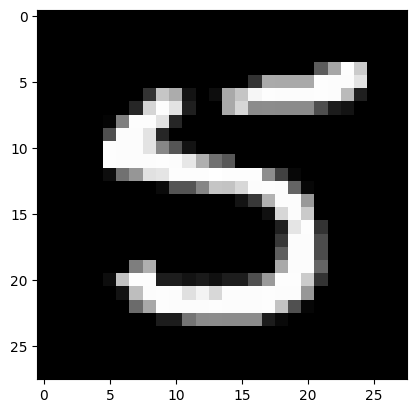

Prediction:  [0]
Label:  5.0


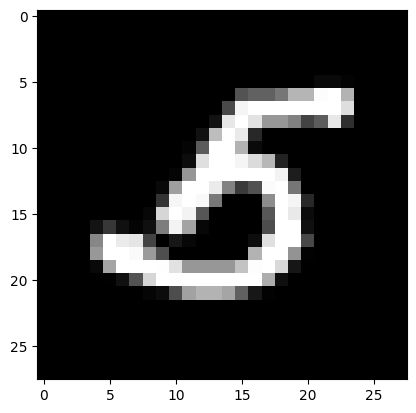

Prediction:  [0]
Label:  0.0


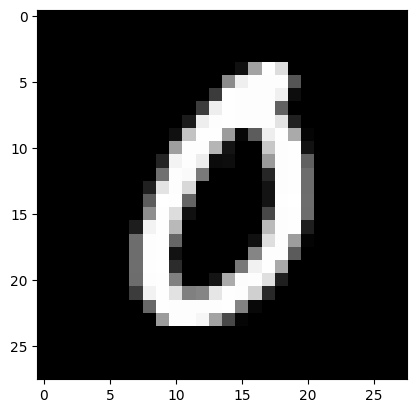

Prediction:  [0]
Label:  8.0


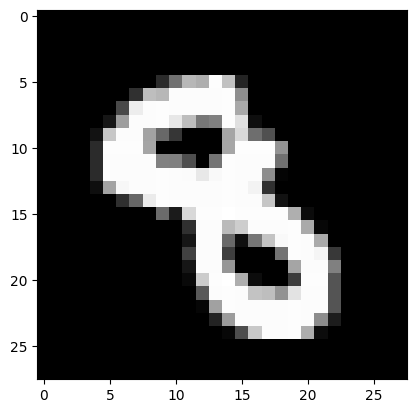

Prediction:  [0]
Label:  3.0


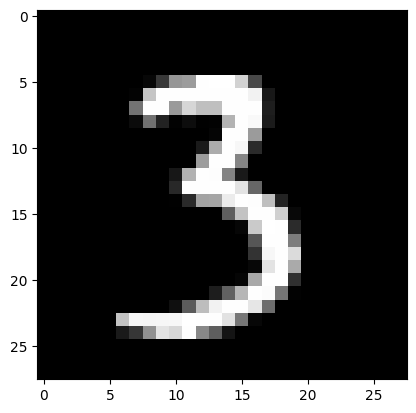

Prediction:  [0]
Label:  3.0


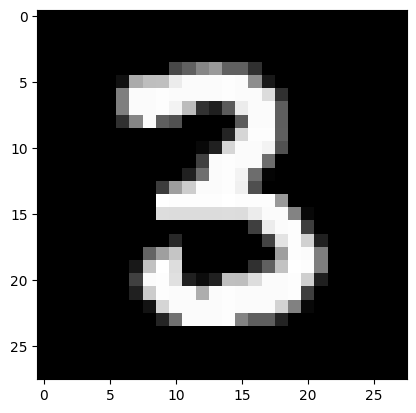

Prediction:  [0]
Label:  7.0


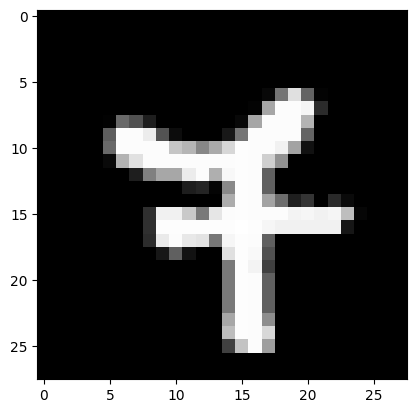

Prediction:  [0]
Label:  4.0


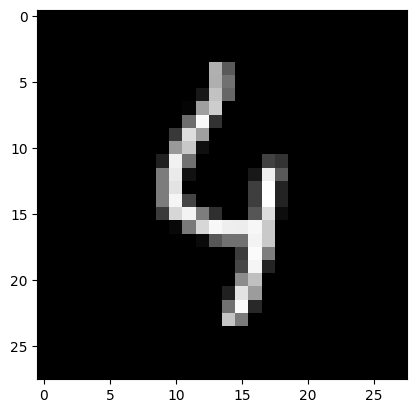

Prediction:  [0]
Label:  9.0


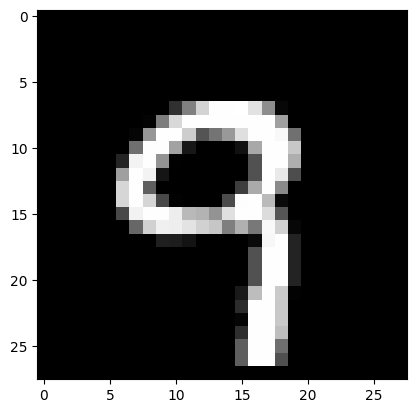

Prediction:  [0]
Label:  9.0


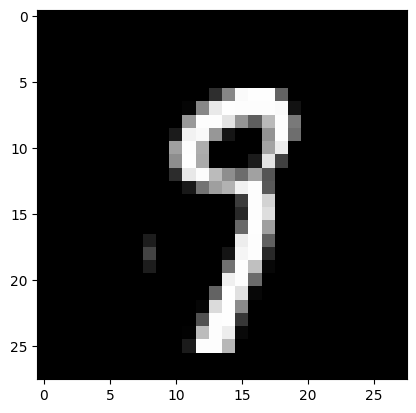

Prediction:  [0]
Label:  7.0


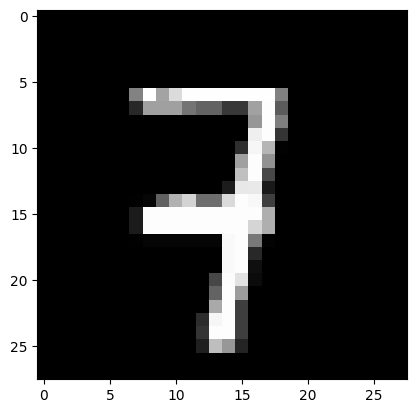

Prediction:  [0]
Label:  1.0


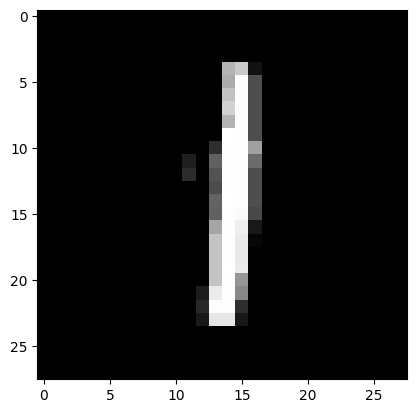

Prediction:  [0]
Label:  0.0


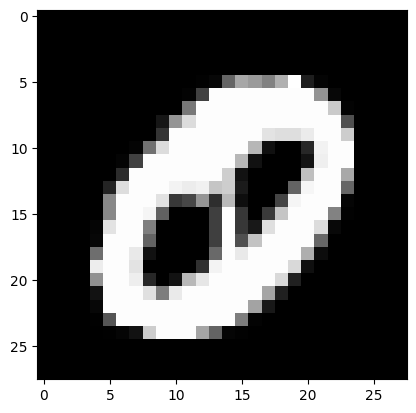

Prediction:  [0]
Label:  3.0


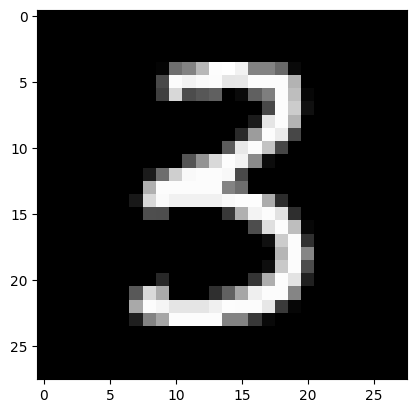

Prediction:  [0]
Label:  8.0


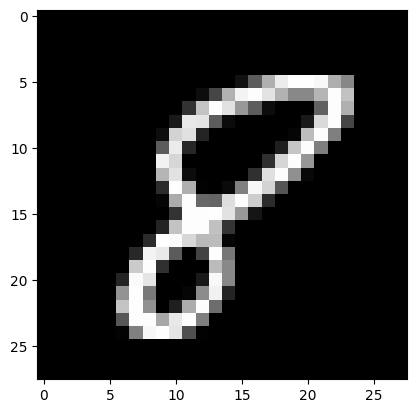

Prediction:  [0]
Label:  3.0


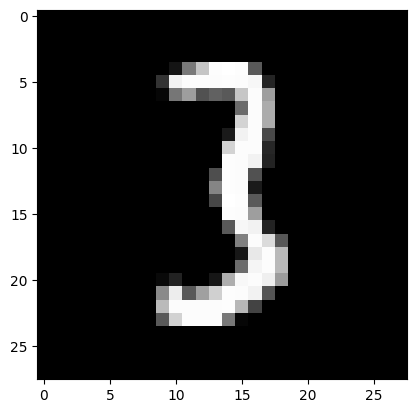

Prediction:  [0]
Label:  3.0


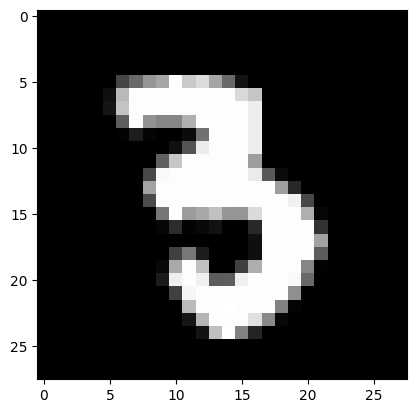

Prediction:  [0]
Label:  5.0


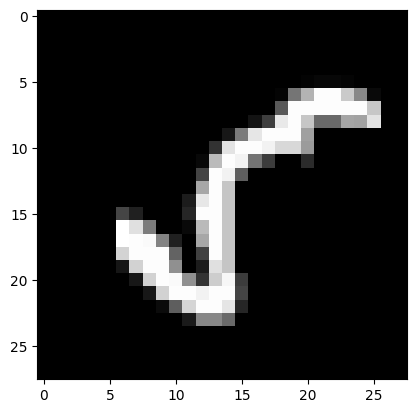

Prediction:  [0]
Label:  0.0


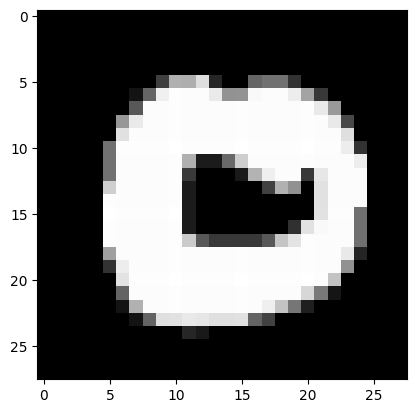

Prediction:  [0]
Label:  6.0


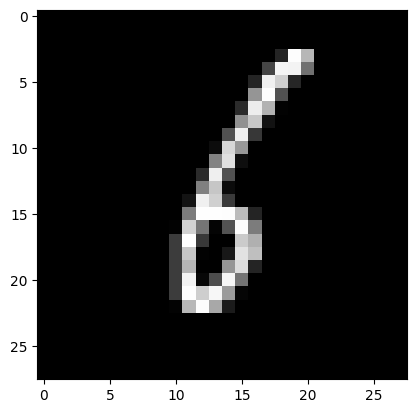

Prediction:  [0]
Label:  6.0


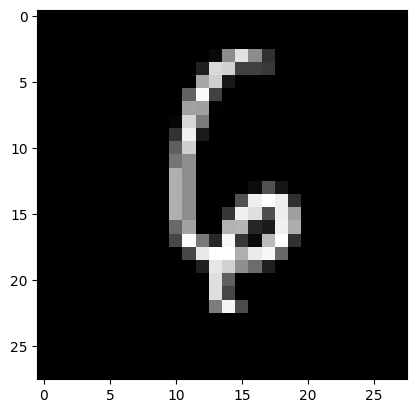

Prediction:  [0]
Label:  3.0


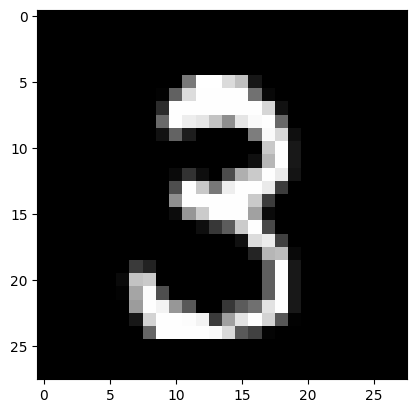

Prediction:  [0]
Label:  7.0


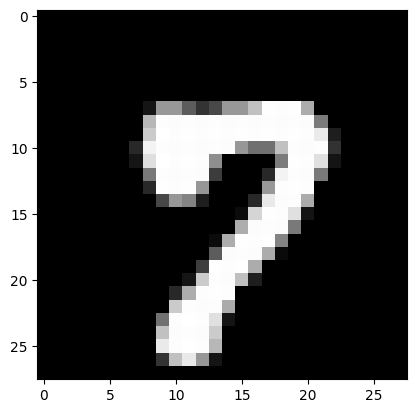

Prediction:  [0]
Label:  5.0


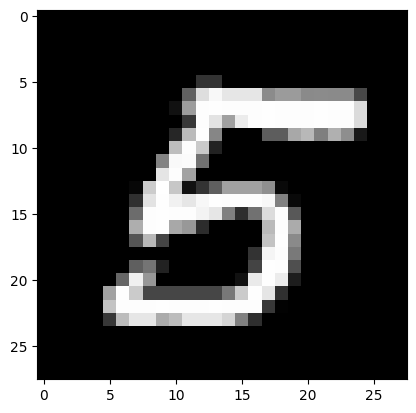

Prediction:  [0]
Label:  4.0


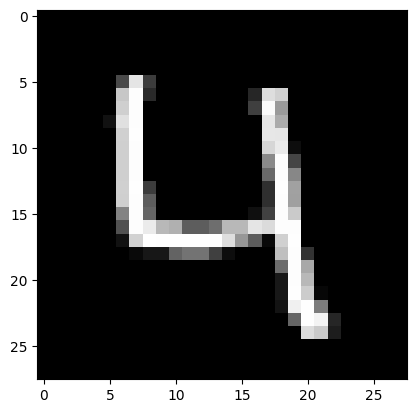

Prediction:  [0]
Label:  6.0


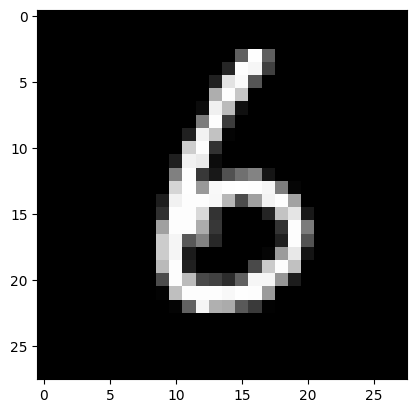

Prediction:  [0]
Label:  1.0


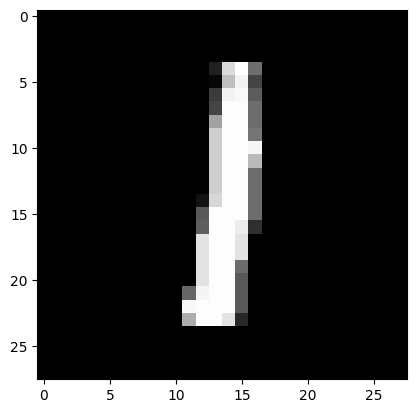

Prediction:  [0]
Label:  5.0


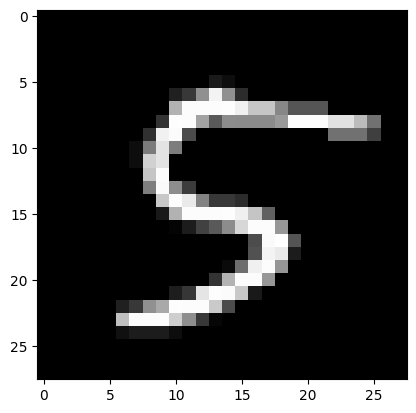

Prediction:  [0]
Label:  0.0


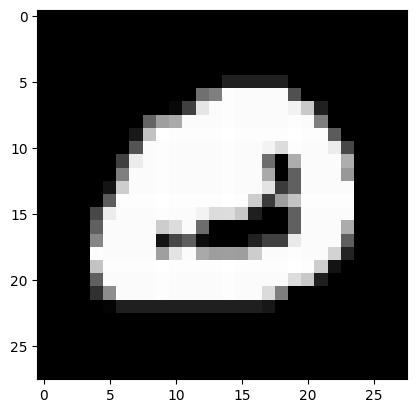

Prediction:  [0]
Label:  2.0


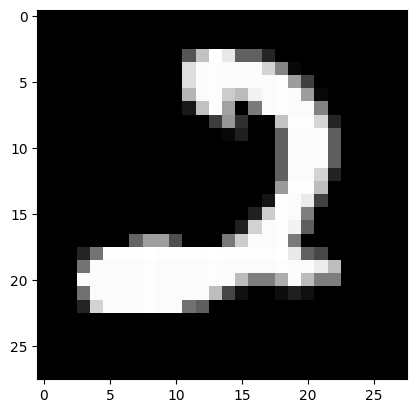

Prediction:  [0]
Label:  2.0


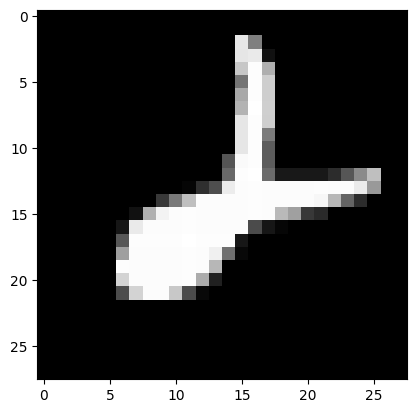

Prediction:  [0]
Label:  4.0


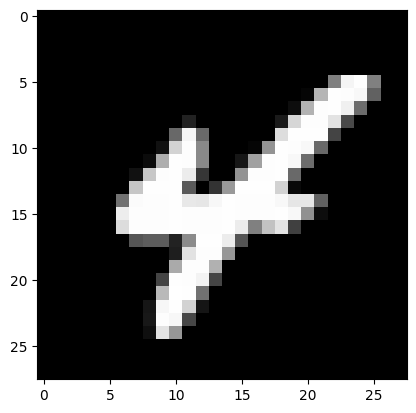

Prediction:  [0]
Label:  8.0


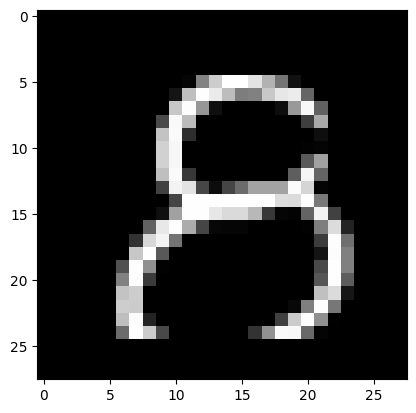

Prediction:  [0]
Label:  2.0


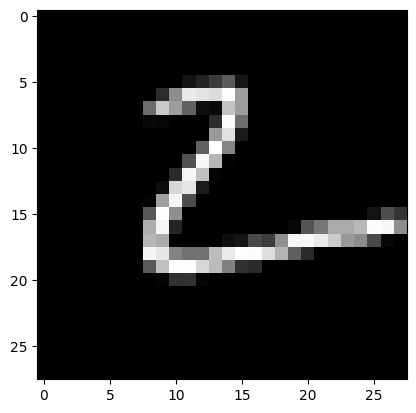

Prediction:  [0]
Label:  1.0


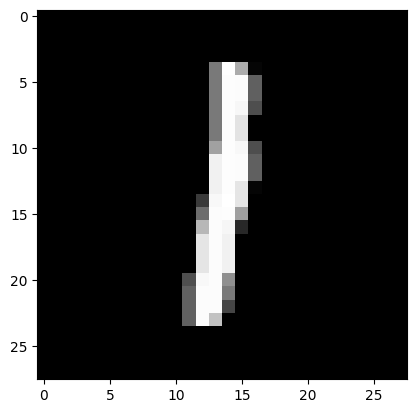

Prediction:  [0]
Label:  3.0


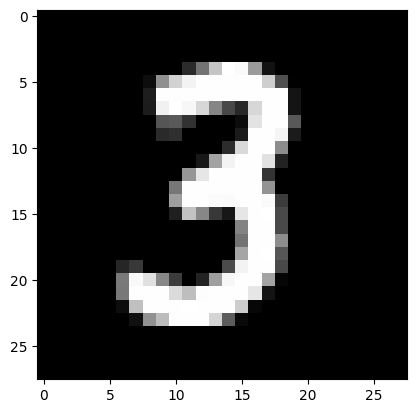

Prediction:  [0]
Label:  1.0


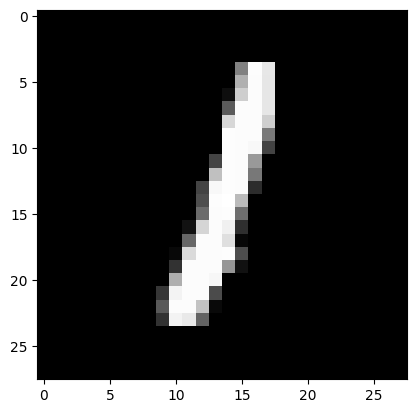

Prediction:  [0]
Label:  8.0


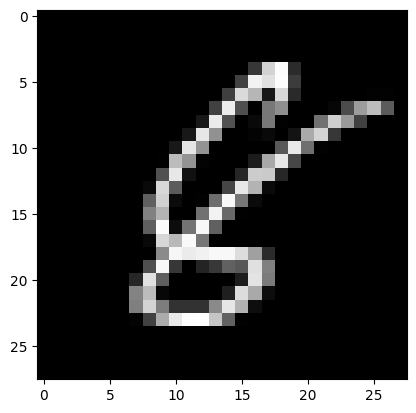

Prediction:  [0]
Label:  0.0


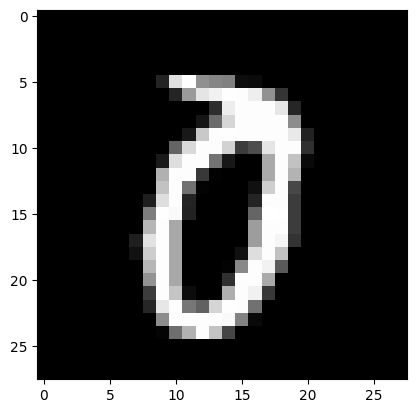

Prediction:  [0]
Label:  7.0


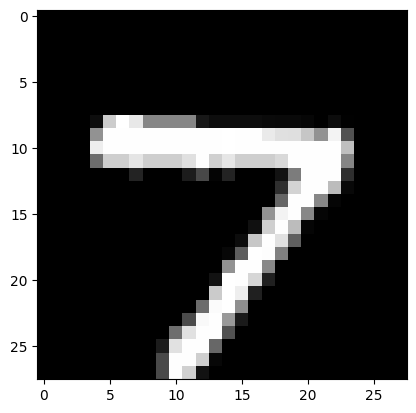

Prediction:  [0]
Label:  5.0


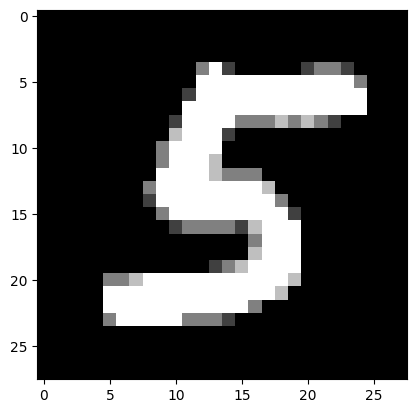

Prediction:  [0]
Label:  8.0


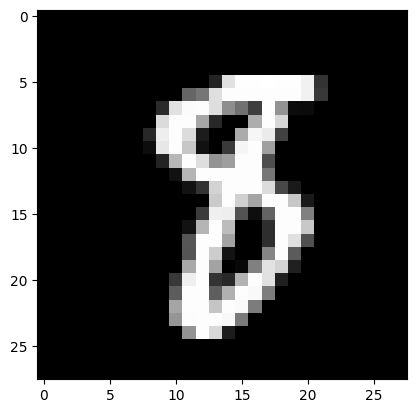

Prediction:  [0]
Label:  1.0


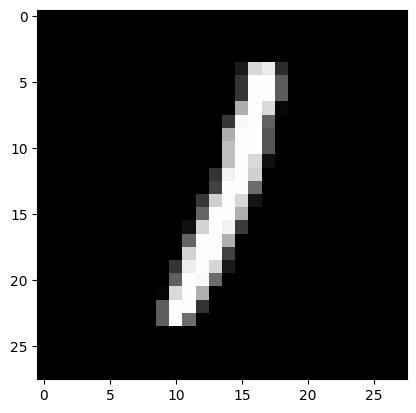

Prediction:  [0]
Label:  1.0


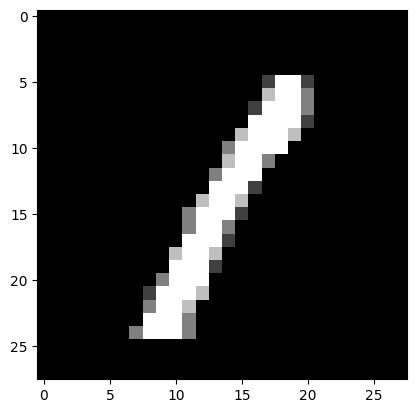

Prediction:  [0]
Label:  3.0


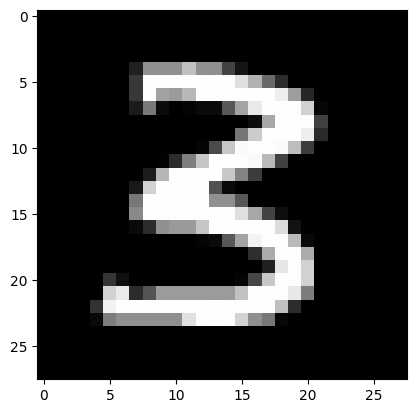

Prediction:  [0]
Label:  0.0


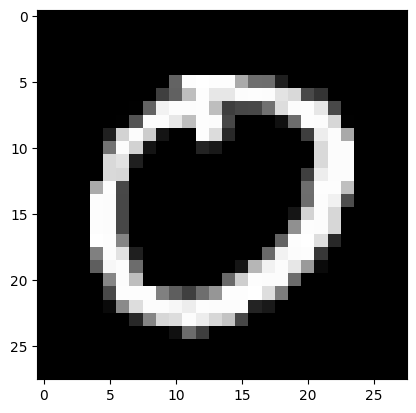

Prediction:  [0]
Label:  3.0


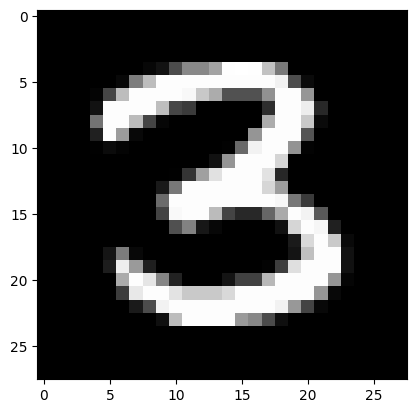

Prediction:  [0]
Label:  4.0


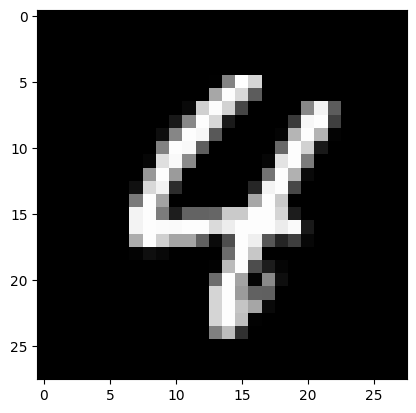

Prediction:  [0]
Label:  4.0


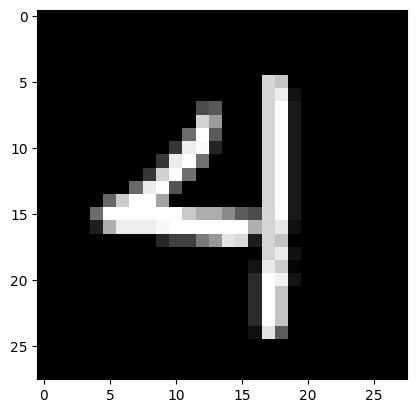

Prediction:  [0]
Label:  2.0


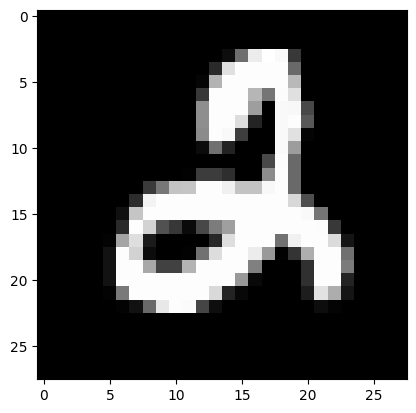

Prediction:  [0]
Label:  7.0


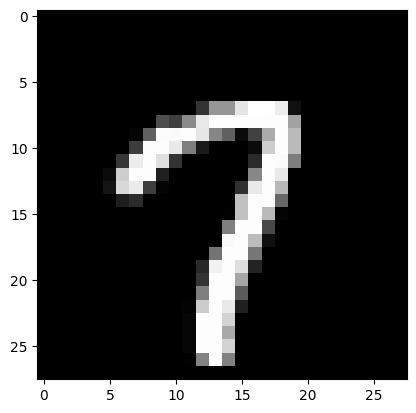

Prediction:  [0]
Label:  6.0


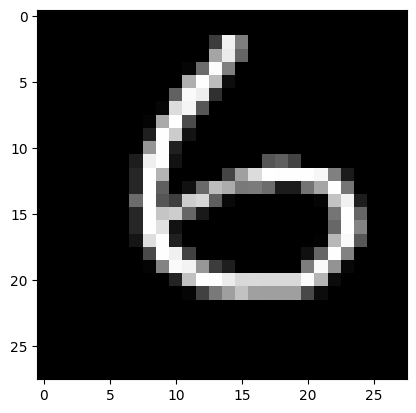

Prediction:  [0]
Label:  1.0


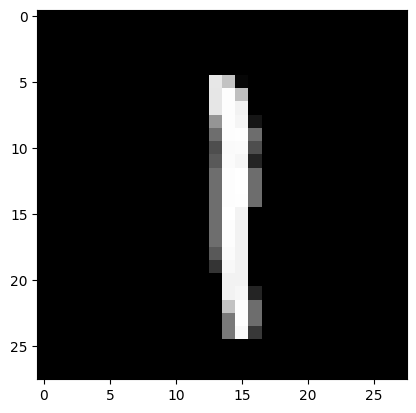

Prediction:  [0]
Label:  6.0


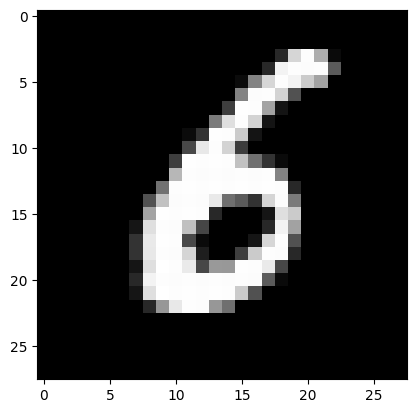

Prediction:  [0]
Label:  9.0


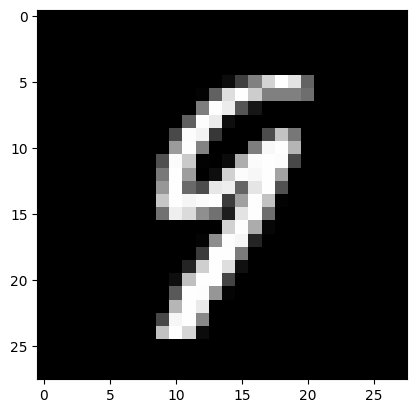

Prediction:  [0]
Label:  1.0


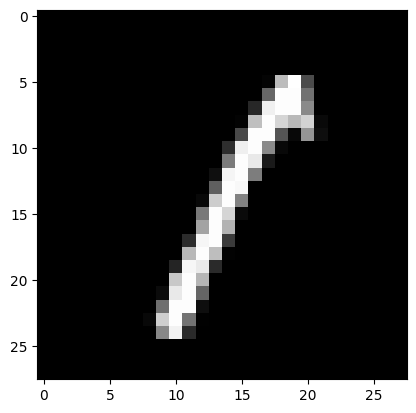

Prediction:  [0]
Label:  9.0


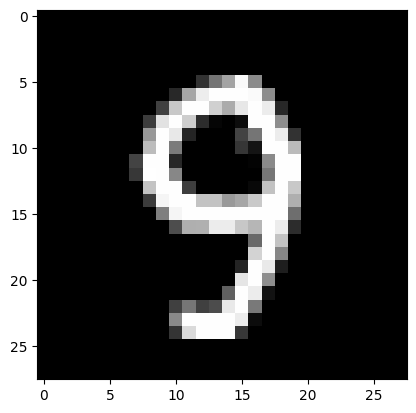

Prediction:  [0]
Label:  8.0


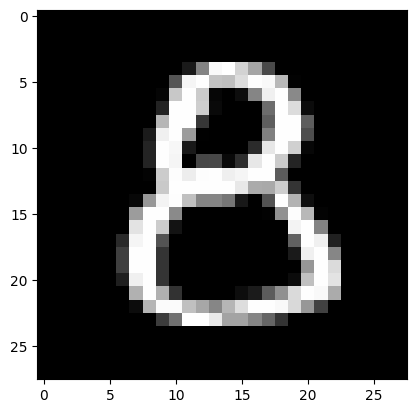

Prediction:  [0]
Label:  1.0


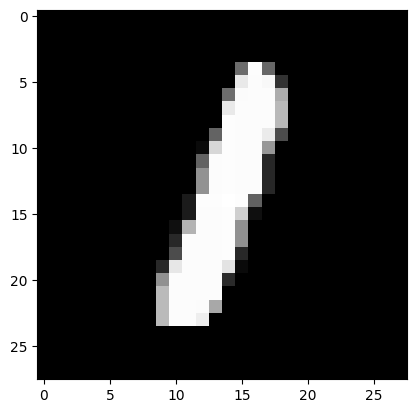

Prediction:  [0]
Label:  8.0


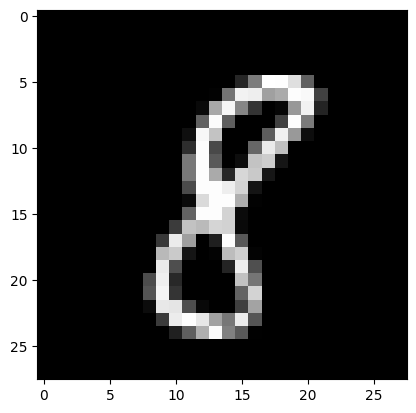

Prediction:  [0]
Label:  6.0


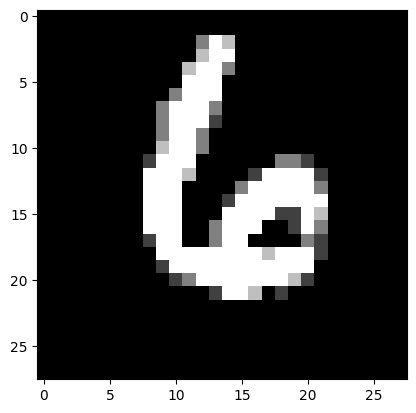

Prediction:  [0]
Label:  9.0


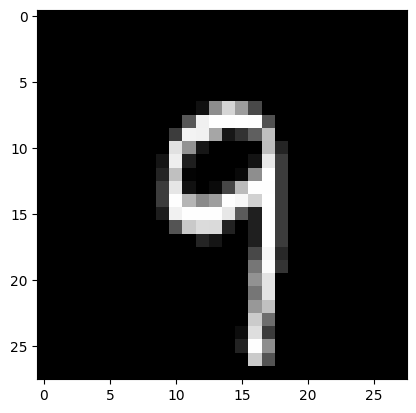

Prediction:  [0]
Label:  4.0


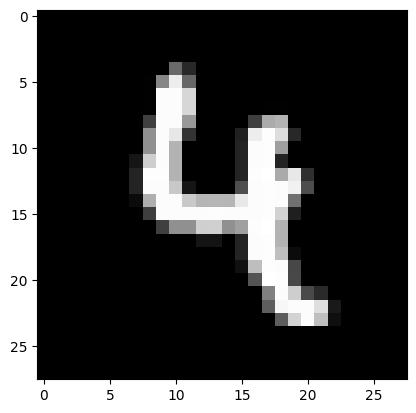

Prediction:  [0]
Label:  6.0


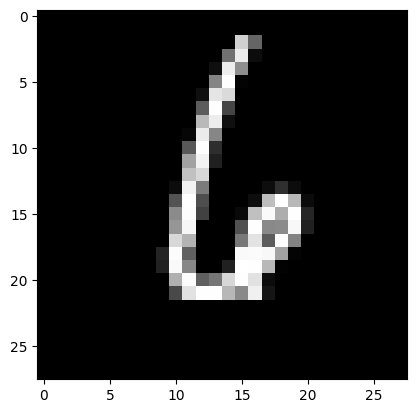

Prediction:  [0]
Label:  7.0


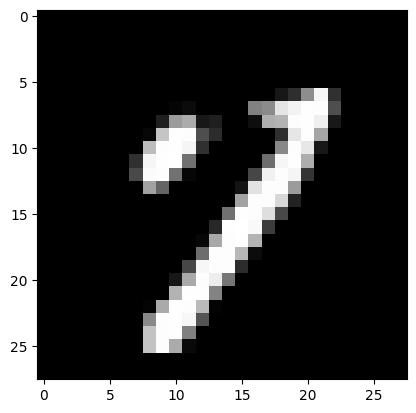

Prediction:  [0]
Label:  6.0


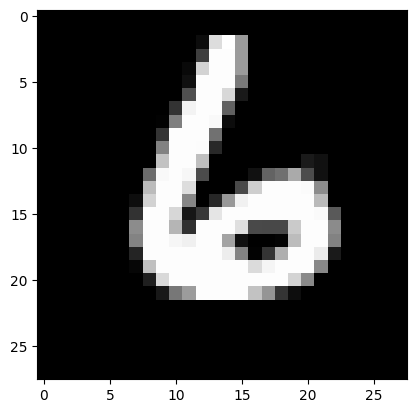

Prediction:  [0]
Label:  5.0


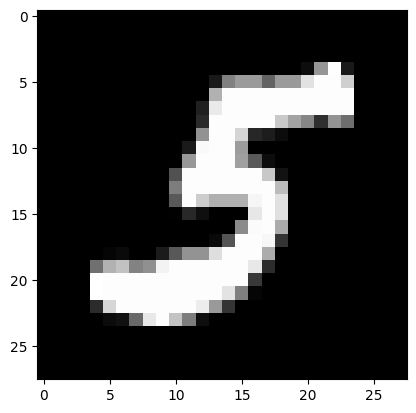

Prediction:  [0]
Label:  3.0


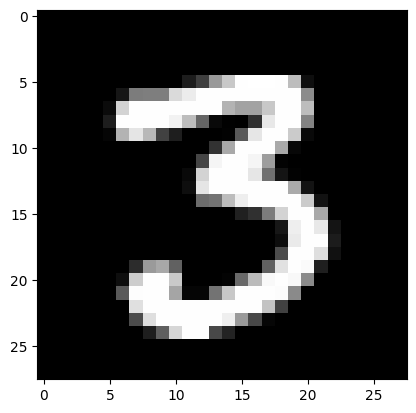

Prediction:  [0]
Label:  2.0


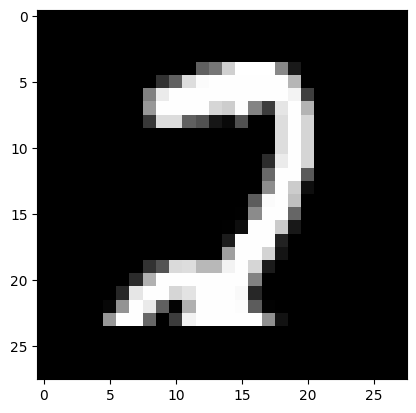

Prediction:  [0]
Label:  9.0


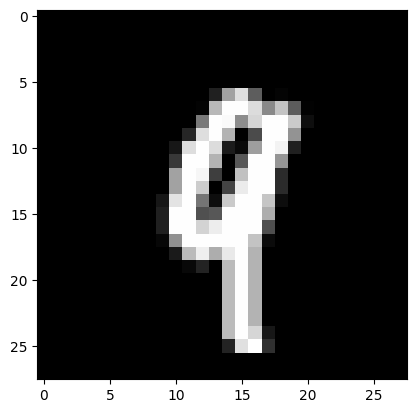

Prediction:  [0]
Label:  9.0


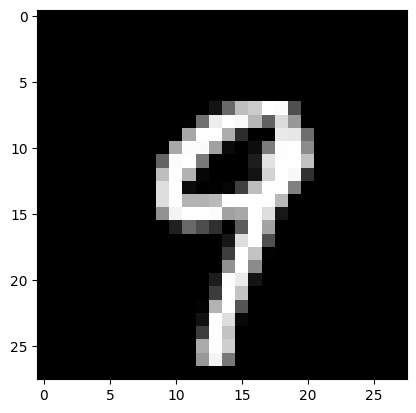

In [17]:
for i in range(100):
    test_prediction(i, W1, b1, W2, b2)